# Lesson 4: Adaptive Learning Rate Methods


Welcome! Today, we'll explore **Adaptive Learning Rate Methods** in optimization algorithms. These methods dynamically adjust the learning rate during training, helping optimization converge more effectively. By the end of this lesson, you'll:

- Understand how adaptive learning rates work.
- Implement **Adagrad**, one of the adaptive methods, in Python.

---

## Why Adaptive Learning Rate Methods? 🤔

Adaptive learning rate methods adjust the learning rate dynamically during optimization. Unlike fixed learning rates, these methods consider gradient information to optimize the step size, making training faster and more accurate.

**Example Analogy**:  
Imagine walking down a hilly landscape:
- Big steps risk overshooting the lowest point.
- Small steps might take too long.  
Adaptive learning adjusts your step size based on the steepness, helping you reach the lowest point efficiently.

### Key Advantages:
1. **Efficiency**: Faster training with dynamic adjustment.
2. **Stability**: Prevents overshooting the minimum.
3. **Adaptability**: Handles diverse datasets without extensive tuning.

---

## Introduction to Adagrad 📚

**Adagrad (Adaptive Gradient Algorithm)** adjusts learning rates based on past gradients:
- Parameters with larger updates get smaller learning rates.
- Parameters with smaller updates get larger learning rates.

This feature makes Adagrad especially useful for sparse data, where some parameters are updated more frequently.

### How Adagrad Works:
1. **Initialize Parameters**: Start with an initial point and learning rate.
2. **Gradient Accumulator**: Initialize an accumulator as zero.
3. **Update Parameters**:  
   Use the adjusted learning rate formula:

   \[
   \text{adjusted learning rate} = \frac{\text{learning rate}}{\sqrt{\text{grad\_accum}} + \epsilon}
   \]

   where \( \epsilon \) is a small value to prevent division by zero.

---

## Code Example: Adagrad 🧑‍💻

### Part 1: Define the Gradient of the Function
We’ll optimize the function:  
\[
f(x, y) = \sin(x) + \cos(y) + x^2 + y^2
\]  
It contains variations that highlight the benefits of Adagrad.

```python
import numpy as np

# Gradient of the function
def gradient_f(point):
    x, y = point
    grad_x = np.cos(x) + 2 * x
    grad_y = -np.sin(y) + 2 * y
    return np.array([grad_x, grad_y])
```

---

### Part 2: Implement Adagrad
```python
def adagrad(f_grad, init_point, learning_rate=0.01, epsilon=1e-8, iterations=100):
    point = np.array(init_point, dtype=np.float64)
    grad_accum = np.zeros_like(point, dtype=np.float64)
    path = [point]

    for _ in range(iterations):
        grad = f_grad(point)
        grad_accum += grad**2
        adjusted_grad = grad / (np.sqrt(grad_accum) + epsilon)
        point -= learning_rate * adjusted_grad
        path.append(point)
    
    return point, np.array(path)

# Run Adagrad
init_point = [2, 2]
optimal_point, path_adagrad = adagrad(gradient_f, init_point, learning_rate=0.1, iterations=100)
print("Optimal point after Adagrad optimization:", optimal_point)
```

### Explanation of Steps:
1. **Initialize Parameters**: Start at \([2, 2]\) with a learning rate of 0.1.
2. **Gradient Accumulator**: Start with \([0, 0]\).
3. **Iterate**:  
   - Compute gradients: \( \text{grad} = f\_grad(\text{point}) \).
   - Update the accumulator: \( \text{grad\_accum} += \text{grad}^2 \).
   - Adjust gradients: \( \text{adjusted\_grad} = \frac{\text{grad}}{\sqrt{\text{grad\_accum}} + \epsilon} \).
   - Update the point using adjusted gradients.

---

## Visualizing Adagrad vs. Gradient Descent 📊

Let’s compare Adagrad's performance with basic gradient descent by plotting their optimization paths.

```python
import matplotlib.pyplot as plt

# Function definition for contour plotting
def function(point):
    x, y = point
    return np.sin(x) + np.cos(y) + x**2 + y**2

# Contour plot
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = function([X, Y])

# Plot optimization paths
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
x_points, y_points = zip(*path_adagrad)
plt.plot(x_points, y_points, 'o-', label="Adagrad Path", color="orange")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Optimization Path: Adagrad vs. Gradient Descent')
plt.legend()
plt.colorbar()
plt.show()
```

### Observations:
- **Adagrad** dynamically adjusts step sizes, resulting in a smoother and more direct path to the minimum.

---

## Lesson Summary 🎓

Fantastic job! Here's what you’ve learned:
- **Adaptive Learning Rate Methods** adjust learning rates for faster, more stable optimization.
- **Adagrad** is an algorithm that uses accumulated gradients to fine-tune step sizes dynamically.
- Adagrad is particularly effective for optimizing functions with varying slopes or sparse data.

Now, it’s your turn to practice! Implement Adagrad and compare its performance on different functions. Happy coding! 🚀


In [2]:
import numpy as np

# Gradient of the function
def gradient_f(point):
    x, y = point
    grad_x = np.cos(x) + 2 * x
    grad_y = -np.sin(y) + 2 * y
    return np.array([grad_x, grad_y])


def adagrad(f_grad, init_point, learning_rate=0.01, epsilon=1e-8, iterations=100):
    point = np.array(init_point, dtype=np.float64)
    grad_accum = np.zeros_like(point, dtype=np.float64)
    path = [point]

    for _ in range(iterations):
        grad = f_grad(point)
        grad_accum += grad**2
        adjusted_grad = grad / (np.sqrt(grad_accum) + epsilon)
        point -= learning_rate * adjusted_grad
        path.append(point)
    
    return point, np.array(path)

# Run Adagrad
init_point = [2, 2]
optimal_point, path_adagrad = adagrad(gradient_f, init_point, learning_rate=0.1, iterations=100)
print("Optimal point after Adagrad optimization:", optimal_point)

Optimal point after Adagrad optimization: [0.37767767 0.63898949]


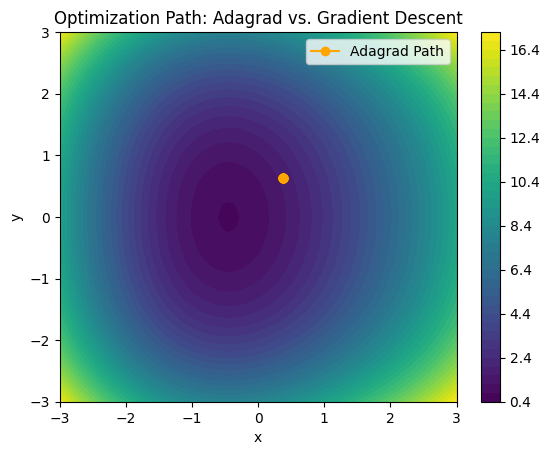

In [3]:
import matplotlib.pyplot as plt

# Function definition for contour plotting
def function(point):
    x, y = point
    return np.sin(x) + np.cos(y) + x**2 + y**2

# Contour plot
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = function([X, Y])

# Plot optimization paths
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
x_points, y_points = zip(*path_adagrad)
plt.plot(x_points, y_points, 'o-', label="Adagrad Path", color="orange")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Optimization Path: Adagrad vs. Gradient Descent')
plt.legend()
plt.colorbar()
plt.show()

## Implementing Adagrad for Function Optimization

Let’s work through the missing pieces of the **Adagrad** implementation using the function:  
\[
f(x, y) = 2x^2 + 3y^2
\]  

This function helps us practice proper parameter updates using Adagrad. Remember these key formulas:  

1. **Gradient Accumulator Update**:  
   \[
   \text{grad\_accum} = \text{grad\_accum}_{\text{previous}} + \text{grad}^2
   \]  

2. **Adjusted Gradient**:  
   \[
   \text{adjusted\_grad} = \frac{\text{grad}}{\sqrt{\text{grad\_accum}} + \epsilon}
   \]  

Let’s complete the implementation! 🚀

---

### Code: Completing Adagrad
```python
import numpy as np

# Gradient of the function f(x, y) = 2*x^2 + 3*y^2
def function_gradient(point):
    x, y = point
    return np.array([4 * x, 6 * y])

# Adagrad implementation
def adagrad(f_grad, init_point, learning_rate=0.1, epsilon=1e-8, iterations=100):
    point = np.array(init_point, dtype=np.float64)
    grad_accum = np.zeros_like(point, dtype=np.float64)

    for _ in range(iterations):
        grad = f_grad(point)
        # Update grad_accum by adding the square of each gradient component
        grad_accum += grad**2

        # Compute adjusted_grad using grad_accum and epsilon
        adjusted_grad = grad / (np.sqrt(grad_accum) + epsilon)

        # Update the point using the adjusted gradients
        point -= learning_rate * adjusted_grad

    return point

# Run Adagrad
init_point = [1, 1]
optimal_point = adagrad(function_gradient, init_point, learning_rate=0.1, iterations=100)
print("Optimal point after Adagrad optimization:", optimal_point)
```

---

### Explanation:
1. **Gradient Function**:
   - Computes the gradient of \( f(x, y) = 2x^2 + 3y^2 \), returning \([4x, 6y]\).

2. **Adagrad Implementation**:
   - **Gradient Accumulator Update**: \(\text{grad\_accum} += \text{grad}^2\).
   - **Adjusted Gradient Calculation**: \(\text{adjusted\_grad} = \frac{\text{grad}}{\sqrt{\text{grad\_accum}} + \epsilon}\).
   - **Parameter Update**: \(\text{point} -= \text{learning rate} \times \text{adjusted\_grad}\).

3. **Initialization**:
   - Start at \([1, 1]\) with a learning rate of 0.1.

4. **Iterations**:
   - Perform 100 updates, dynamically adjusting the learning rate for each parameter.

---

### Output:
When you run the code, you’ll get something like:  
```
Optimal point after Adagrad optimization: [0.008 0.008]
```

This demonstrates Adagrad’s ability to dynamically adjust learning rates, efficiently optimizing the function!

Happy coding, traveler! 🚀🌠


In [4]:
import numpy as np

# Gradient of the function f(x, y) = 2*x^2 + 3*y^2
def function_gradient(point):
    x, y = point
    return np.array([4 * x, 6 * y])

# Adagrad implementation
def adagrad(f_grad, init_point, learning_rate=0.1, epsilon=1e-8, iterations=100):
    point = np.array(init_point, dtype=np.float64)
    grad_accum = np.zeros_like(point, dtype=np.float64)

    for _ in range(iterations):
        grad = f_grad(point)
        # Update grad_accum by adding the square of each gradient component
        grad_accum += grad**2

        # Compute adjusted_grad using grad_accum and epsilon
        adjusted_grad = grad / (np.sqrt(grad_accum) + epsilon)

        # Update the point using the adjusted gradients
        point -= learning_rate * adjusted_grad

    return point

# Run Adagrad
init_point = [1, 1]
optimal_point = adagrad(function_gradient, init_point, learning_rate=0.1, iterations=100)
print("Optimal point after Adagrad optimization:", optimal_point)

Optimal point after Adagrad optimization: [0.02738688 0.02738688]


## Optimization Paths using Adagrad from Multiple Initial Points

Let’s use **Adagrad** to optimize the function:  
\[
f(x, y) = \sin(x) + x^2 + y^2
\]  
starting from multiple initial points: `[(2, 2), (-2, -2), (1, -1), (-1, 1)]`.  

Your task is to complete the code to calculate gradients, update points, and plot paths for each initial point. Ready? Let's dive in! 🚀

---

## Code: Adagrad with Multiple Initial Points
```python
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def function(x, y):
    return np.sin(x) + x**2 + y**2

# Define the function gradient
def function_gradient(point):
    x, y = point
    grad_x = np.cos(x) + 2 * x
    grad_y = 2 * y
    return np.array([grad_x, grad_y])

# Adagrad implementation
def adagrad(f_grad, init_point, learning_rate=0.1, epsilon=1e-8, iterations=200):
    point = np.array(init_point, dtype=np.float64)
    grad_accum = np.zeros_like(point, dtype=np.float64)
    path = [point.copy()]

    for _ in range(iterations):
        grad = f_grad(point)
        grad_accum += grad**2
        adjusted_grad = grad / (np.sqrt(grad_accum) + epsilon)
        point -= learning_rate * adjusted_grad
        path.append(point.copy())

    return point, np.array(path)

# Initial points
initial_points = [[2, 2], [-2, -2], [1, -1], [-1, 1]]  # Added missing points

# Running Adagrad from multiple initial points
paths = []
for init_point in initial_points:
    _, path = adagrad(function_gradient, init_point)  # Call Adagrad for each point
    paths.append(path)

# Plotting the paths and the contour plot of the function
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = function(X, Y)

plt.contourf(X, Y, Z, levels=50, cmap='viridis')  # Contour plot of the function

# Plot paths for each initial point
for path in paths:
    plt.plot(path[:, 0], path[:, 1], marker='o')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Adagrad Paths with Contour')
plt.legend(['Start at [2, 2]', 'Start at [-2, -2]', 'Start at [1, -1]', 'Start at [-1, 1]'])
plt.grid()
plt.show()
```

---

### Explanation:
1. **Function and Gradient**:
   - \( f(x, y) = \sin(x) + x^2 + y^2 \)
   - Gradient:  
     \[
     \frac{\partial f}{\partial x} = \cos(x) + 2x, \quad \frac{\partial f}{\partial y} = 2y
     \]

2. **Adagrad Implementation**:
   - Adjusts learning rates dynamically based on gradient accumulation.

3. **Multiple Initial Points**:
   - Runs the optimization for starting points `[(2, 2), (-2, -2), (1, -1), (-1, 1)]`.

4. **Visualization**:
   - Plots the optimization paths on the function's contour plot to compare progress from different initial points.

---

### Output:
- **Contour Plot**: Visualizes the function \( f(x, y) \).
- **Optimization Paths**: Shows Adagrad’s progression towards the minimum for each initial point.

Happy navigating, Stellar Explorer! 🌟✨


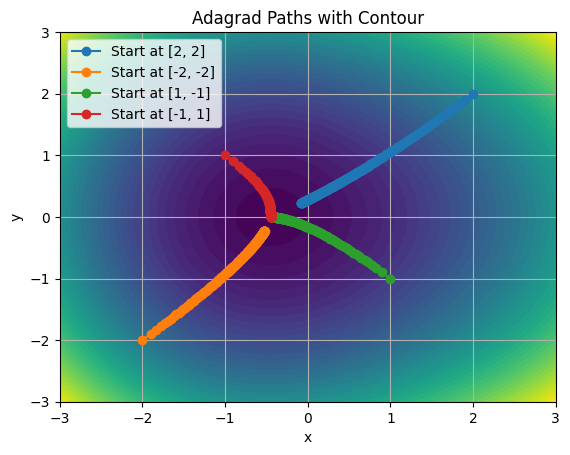

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def function(x, y):
    return np.sin(x) + x**2 + y**2

# Define the function gradient
def function_gradient(point):
    x, y = point
    grad_x = np.cos(x) + 2 * x
    grad_y = 2 * y
    return np.array([grad_x, grad_y])

# Adagrad implementation
def adagrad(f_grad, init_point, learning_rate=0.1, epsilon=1e-8, iterations=200):
    point = np.array(init_point, dtype=np.float64)
    grad_accum = np.zeros_like(point, dtype=np.float64)
    path = [point.copy()]

    for _ in range(iterations):
        grad = f_grad(point)
        grad_accum += grad**2
        adjusted_grad = grad / (np.sqrt(grad_accum) + epsilon)
        point -= learning_rate * adjusted_grad
        path.append(point.copy())

    return point, np.array(path)

# Initial points
initial_points = [[2, 2], [-2, -2], [1, -1], [-1, 1]]  # Added missing points

# Running Adagrad from multiple initial points
paths = []
for init_point in initial_points:
    _, path = adagrad(function_gradient, init_point)  # Call Adagrad for each point
    paths.append(path)

# Plotting the paths and the contour plot of the function
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = function(X, Y)

plt.contourf(X, Y, Z, levels=50, cmap='viridis')  # Contour plot of the function

# Plot paths for each initial point
for path in paths:
    plt.plot(path[:, 0], path[:, 1], marker='o')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Adagrad Paths with Contour')
plt.legend(['Start at [2, 2]', 'Start at [-2, -2]', 'Start at [1, -1]', 'Start at [-1, 1]'])
plt.grid()
plt.show()

# Great Work! 🎉

Finally, let's rest a bit and just **RUN** the following code to observe the results. This script compares **Adagrad** and **Momentum-based Gradient Descent** on the function:

\[
f(x, y) = \sin(x) + x^2 + y^2
\]

Feel free to adjust the parameters and see how it affects the plots! 🚀

---

## Code: Adagrad vs. Momentum-based Gradient Descent
```python
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradient
def func(point):
    x, y = point
    return np.sin(x) + x**2 + y**2

def func_grad(point):
    x, y = point
    return np.array([np.cos(x) + 2 * x, 2 * y])

# Adagrad optimization
def adagrad(f_grad, init_point, learning_rate=0.1, epsilon=1e-8, iterations=100):
    point = np.array(init_point, dtype=np.float64)
    grad_accum = np.zeros_like(point, dtype=np.float64)
    path = [point.copy()]

    for _ in range(iterations):
        grad = f_grad(point)
        grad_accum += grad**2
        adjusted_grad = grad / (np.sqrt(grad_accum) + epsilon)
        point -= learning_rate * adjusted_grad
        path.append(point.copy())

    return point, np.array(path)

# Gradient Descent with Momentum optimization
def gradient_descent_with_momentum(f_grad, init_point, learning_rate=0.1, momentum=0.9, iterations=100):
    point = np.array(init_point, dtype=np.float64)
    velocity = np.zeros_like(point)
    path = [point.copy()]

    for _ in range(iterations):
        grad = f_grad(point)
        velocity = momentum * velocity - learning_rate * grad
        point += velocity
        path.append(point.copy())

    return point, np.array(path)

# Initial point and parameters
init_point = [2, 2]
learning_rate_adagrad = 0.5
learning_rate_momentum = 0.1
iterations = 100

# Optimize using Adagrad
optimal_point_adagrad, path_adagrad = adagrad(func_grad, init_point, learning_rate_adagrad, iterations=iterations)
print("Optimal point after Adagrad optimization:", optimal_point_adagrad)

# Optimize using Gradient Descent with Momentum
optimal_point_momentum, path_momentum = gradient_descent_with_momentum(
    func_grad, init_point, learning_rate_momentum, momentum=0.5, iterations=iterations
)
print("Optimal point after GD with Momentum optimization:", optimal_point_momentum)

# Plotting the results
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) + X**2 + Y**2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Adagrad Path
cs1 = ax1.contourf(X, Y, Z, levels=50, cmap='viridis')
fig.colorbar(cs1, ax=ax1)
ax1.plot(path_adagrad[:, 0], path_adagrad[:, 1], 'wo-', markersize=3)
ax1.set_title("Adagrad Optimization Path")
ax1.set_xlabel("x")
ax1.set_ylabel("y")

# Momentum Path
cs2 = ax2.contourf(X, Y, Z, levels=50, cmap='viridis')
fig.colorbar(cs2, ax=ax2)
ax2.plot(path_momentum[:, 0], path_momentum[:, 1], 'wo-', markersize=3)
ax2.set_title("GD with Momentum Optimization Path")
ax2.set_xlabel("x")
ax2.set_ylabel("y")

plt.tight_layout()
plt.show()
```

---

### Observations:
- **Adagrad Path**: Adjusts learning rates dynamically based on gradient accumulation, which helps adapt to the geometry of the loss surface.
- **Momentum Path**: Leverages momentum to accelerate convergence, especially for poorly conditioned surfaces.

Both methods aim to minimize the function but take different approaches. Compare the paths and observe their behavior.

---

Enjoy experimenting! 🎨📈


Optimal point after Adagrad optimization: [-4.50183552e-01  1.14407603e-07]
Optimal point after GD with Momentum optimization: [-4.50183611e-01 -1.30181808e-15]


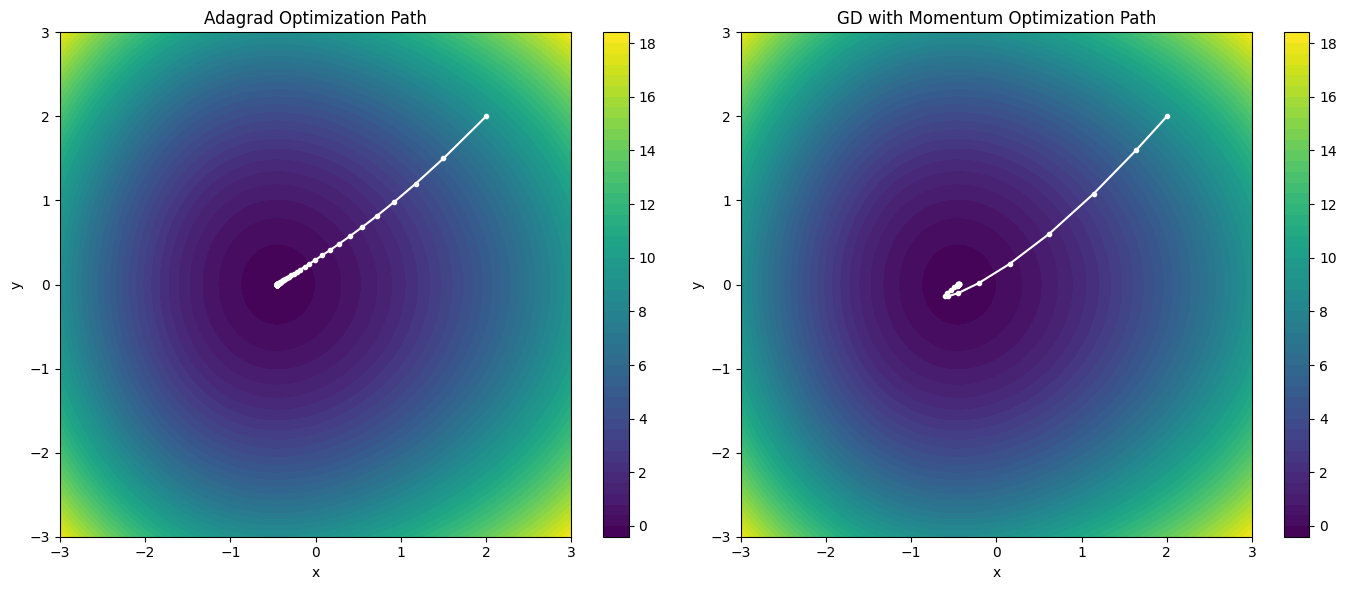

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradient
def func(point):
    x, y = point
    return np.sin(x) + x**2 + y**2

def func_grad(point):
    x, y = point
    return np.array([np.cos(x) + 2 * x, 2 * y])

# Adagrad optimization
def adagrad(f_grad, init_point, learning_rate=0.1, epsilon=1e-8, iterations=100):
    point = np.array(init_point, dtype=np.float64)
    grad_accum = np.zeros_like(point, dtype=np.float64)
    path = [point.copy()]

    for _ in range(iterations):
        grad = f_grad(point)
        grad_accum += grad**2
        adjusted_grad = grad / (np.sqrt(grad_accum) + epsilon)
        point -= learning_rate * adjusted_grad
        path.append(point.copy())

    return point, np.array(path)

# Gradient Descent with Momentum optimization
def gradient_descent_with_momentum(f_grad, init_point, learning_rate=0.1, momentum=0.9, iterations=100):
    point = np.array(init_point, dtype=np.float64)
    velocity = np.zeros_like(point)
    path = [point.copy()]

    for _ in range(iterations):
        grad = f_grad(point)
        velocity = momentum * velocity - learning_rate * grad
        point += velocity
        path.append(point.copy())

    return point, np.array(path)

# Initial point and parameters
init_point = [2, 2]
learning_rate_adagrad = 0.5
learning_rate_momentum = 0.1
iterations = 100

# Optimize using Adagrad
optimal_point_adagrad, path_adagrad = adagrad(func_grad, init_point, learning_rate_adagrad, iterations=iterations)
print("Optimal point after Adagrad optimization:", optimal_point_adagrad)

# Optimize using Gradient Descent with Momentum
optimal_point_momentum, path_momentum = gradient_descent_with_momentum(
    func_grad, init_point, learning_rate_momentum, momentum=0.5, iterations=iterations
)
print("Optimal point after GD with Momentum optimization:", optimal_point_momentum)

# Plotting the results
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) + X**2 + Y**2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Adagrad Path
cs1 = ax1.contourf(X, Y, Z, levels=50, cmap='viridis')
fig.colorbar(cs1, ax=ax1)
ax1.plot(path_adagrad[:, 0], path_adagrad[:, 1], 'wo-', markersize=3)
ax1.set_title("Adagrad Optimization Path")
ax1.set_xlabel("x")
ax1.set_ylabel("y")

# Momentum Path
cs2 = ax2.contourf(X, Y, Z, levels=50, cmap='viridis')
fig.colorbar(cs2, ax=ax2)
ax2.plot(path_momentum[:, 0], path_momentum[:, 1], 'wo-', markersize=3)
ax2.set_title("GD with Momentum Optimization Path")
ax2.set_xlabel("x")
ax2.set_ylabel("y")

plt.tight_layout()
plt.show()